<a href="https://colab.research.google.com/github/deviabburi/Prathyusha/blob/main/DataAnalyticsProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART-1 (UNIVERSITIES ASSIGNMENT)

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/sample_data/Universities.csv')
df = df.dropna() #Drop Missing values

scaler = StandardScaler()

continuous_column = ['# appli. rec\'d', '# appl. accepted', '# new stud. enrolled', '% new stud. from top 10%',
                   '% new stud. from top 25%', '# FT undergrad', '# PT undergrad', 'in-state tuition',
                   'out-of-state tuition', 'room', 'board', 'add. fees', 'estim. book costs',
                   'estim. personal $', '% fac. w/PHD', 'stud./fac. ratio', 'Graduation rate']

df[continuous_column] = scaler.fit_transform(df[continuous_column])

df

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,-0.726085,-0.766447,-0.793414,-0.650759,-0.573903,-0.710495,0.046333,-0.335086,-0.700046,-0.843743,0.667644,-0.700526,1.541090,0.276102,0.167704,-0.529598,-2.789257
2,University of Alaska Southeast,AK,1,-0.737636,-0.778042,-0.756242,-1.300829,-1.558991,-0.658397,0.680985,-1.390805,-1.241943,0.411116,0.226150,-0.970586,-0.299262,-0.220137,-2.054792,-1.145818,-1.465311
9,Birmingham-Southern College,AL,2,-0.575673,-0.589724,-0.539768,2.112035,1.593292,-0.468871,-0.382380,0.408890,0.251873,-0.240175,0.544026,-0.728658,-0.912713,-0.604796,0.047569,0.009594,0.355113
11,Huntingdon College,AL,2,-0.624090,-0.616912,-0.714697,-0.109035,-0.426140,-0.648535,-0.434836,-0.240728,-0.579315,-1.180618,0.738283,-0.784920,-0.299262,-0.311163,-0.613173,-0.657977,-1.189489
21,Talladega College,AL,2,0.311318,-0.225084,-0.487290,0.107655,0.214168,-0.569208,-0.439369,-0.678766,-1.139785,-1.118857,-1.027693,0.109652,2.767992,0.129286,-1.033645,0.394732,-1.079161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,Univ. of Wisconsin at Eau Claire,WI,1,0.634509,0.982388,1.286045,-0.434070,-0.179868,1.061916,0.302137,-1.306246,-0.830992,-0.920943,-1.734084,1.943806,-1.654989,-0.076257,0.407974,1.370413,-0.251695
1283,Wisconsin Lutheran College,WI,2,-0.736162,-0.773644,-0.771548,-0.596587,-0.721666,-0.703420,-0.502187,-0.055641,-0.342496,-0.591087,-0.391942,-0.813051,-0.299262,0.129286,-1.514185,-1.402576,-0.858503
1284,Alderson-Broaddus College,WV,2,-0.630480,-0.625708,-0.665498,-0.379897,-0.573903,-0.592577,-0.465921,0.192593,-0.024880,-0.908311,-0.557944,-0.807425,0.682259,0.716551,-1.994724,-0.632301,-0.748174
1291,Marshall University,WV,2,0.265113,0.640938,1.340710,-0.759104,0.214168,0.887612,0.998310,-1.405684,-1.272590,-0.268248,-0.250664,-0.137903,0.927639,0.364192,0.227772,0.677166,-0.858503


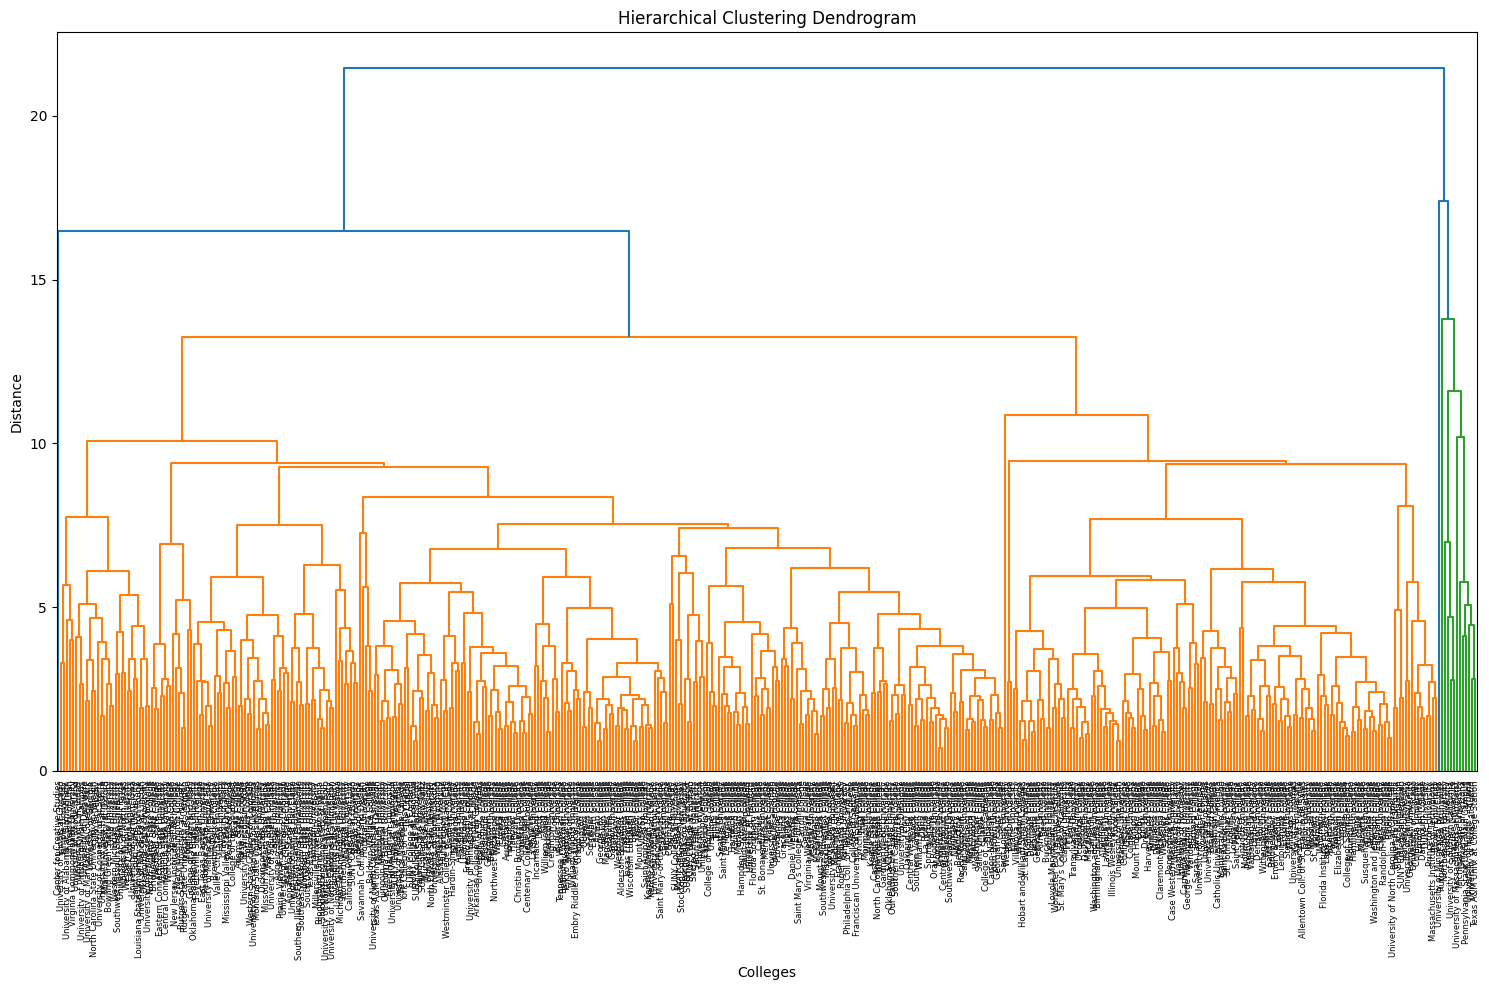

In [18]:
# prompt: Using dataframe df: Perform Hierarchical Clustering:
# Use complete linkage and Euclidean distance.
# Plot the Dendrogram.

import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

numerical_features = df.select_dtypes(include=['number'])
hc_mergings = linkage(numerical_features, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15,10))
dendrogram(hc_mergings,
           labels=df['College Name'].tolist(),
           leaf_rotation=90,
           leaf_font_size=6)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Colleges")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [19]:
#Choose number of clusters from dendrogram

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

max_dist = 6
labels = fcluster(hc_mergings, max_dist, criterion='distance')
df['cluster_labels'] = labels
print(df)

for cluster_num in range(1, len(df['cluster_labels'].unique())+1):
    print(f"Cluster {cluster_num}:")
    print(df[df['cluster_labels'] == cluster_num].mean(numeric_only=True))


                          College Name State  Public (1)/ Private (2)  \
0            Alaska Pacific University    AK                        2   
2       University of Alaska Southeast    AK                        1   
9          Birmingham-Southern College    AL                        2   
11                  Huntingdon College    AL                        2   
21                   Talladega College    AL                        2   
...                                ...   ...                      ...   
1274  Univ. of Wisconsin at Eau Claire    WI                        1   
1283        Wisconsin Lutheran College    WI                        2   
1284         Alderson-Broaddus College    WV                        2   
1291               Marshall University    WV                        2   
1301             University of Wyoming    WY                        1   

      # appli. rec'd  # appl. accepted  # new stud. enrolled  \
0          -0.726085         -0.766447             -0.79341

In [20]:
missing_data_indices = df[df.isnull().any(axis=1)].index

# Impute missing values using cluster means
for index in missing_data_indices:
    nearest_cluster = find_nearest_cluster(df.loc[index], df, hc_mergings, max_dist)
    cluster_means = df[df['cluster_labels'] == nearest_cluster].mean(numeric_only=True)

    for col in df.columns:
        if pd.isnull(df.loc[index, col]):
          if col in cluster_means.index:
              df.loc[index, col] = cluster_means[col]

          else:
              # Impute with a suitable strategy (e.g., mode for categorical features)
              df.loc[index, col] = df[df['cluster_labels'] == nearest_cluster][col].mode()[0]


#Helper function to find nearest cluster
def find_nearest_cluster(row, df, hc_mergings, max_dist):
    #Remove the row with missing values to avoid influencing cluster assignments
    temp_df = df.drop(index=row.name)

    # Perform clustering on the temporary DataFrame
    features_temp = temp_df.select_dtypes(include=['number'])
    mergings_temp = linkage(features_temp, method='complete', metric='euclidean')

    labels_temp = fcluster(mergings_temp, max_dist, criterion='distance')
    temp_df['cluster_labels_temp'] = labels_temp

    # Find the nearest cluster for the record with missing values
    distances = []
    for cluster_num in temp_df['cluster_labels_temp'].unique():
        cluster_data = temp_df[temp_df['cluster_labels_temp'] == cluster_num]
        #Calculate the distance between the row and the centroid
        centroid = cluster_data.mean(numeric_only=True)
        distance = euclidean_distance(row,centroid)
        distances.append((cluster_num, distance))

    nearest_cluster = min(distances,key = lambda x:x[1])[0]
    return nearest_cluster

from scipy.spatial.distance import euclidean
def euclidean_distance(row1, row2):
  row1_values = [val for val in row1 if isinstance(val, (int, float))]
  row2_values = [val for val in row2 if isinstance(val, (int, float))]

  if len(row1_values)>0 and len(row2_values)>0:
    return euclidean(row1_values, row2_values)
  else:
    return 0
df


,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,...,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate,cluster_labels
0,Alaska Pacific University,AK,2,-0.726085,-0.766447,-0.793414,-0.650759,-0.573903,-0.710495,0.046333,...,-0.700046,-0.843743,0.667644,-0.700526,1.541090,0.276102,0.167704,-0.529598,-2.789257,11
2,University of Alaska Southeast,AK,1,-0.737636,-0.778042,-0.756242,-1.300829,-1.558991,-0.658397,0.680985,...,-1.241943,0.411116,0.226150,-0.970586,-0.299262,-0.220137,-2.054792,-1.145818,-1.465311,18
9,Birmingham-Southern College,AL,2,-0.575673,-0.589724,-0.539768,2.112035,1.593292,-0.468871,-0.382380,...,0.251873,-0.240175,0.544026,-0.728658,-0.912713,-0.604796,0.047569,0.009594,0.355113,20
11,Huntingdon College,AL,2,-0.624090,-0.616912,-0.714697,-0.109035,-0.426140,-0.648535,-0.434836,...,-0.579315,-1.180618,0.738283,-0.784920,-0.299262,-0.311163,-0.613173,-0.657977,-1.189489,11
21,Talladega College,AL,2,0.311318,-0.225084,-0.487290,0.107655,0.214168,-0.569208,-0.439369,...,-1.139785,-1.118857,-1.027693,0.109652,2.767992,0.129286,-1.033645,0.394732,-1.079161,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,Univ. of Wisconsin at Eau Claire,WI,1,0.634509,0.982388,1.286045,-0.434070,-0.179868,1.061916,0.302137,...,-0.830992,-0.920943,-1.734084,1.943806,-1.654989,-0.076257,0.407974,1.370413,-0.251695,7
1283,Wisconsin Lutheran College,WI,2,-0.736162,-0.773644,-0.771548,-0.596587,-0.721666,-0.703420,-0.502187,...,-0.342496,-0.591087,-0.391942,-0.813051,-0.299262,0.129286,-1.514185,-1.402576,-0.858503,12
1284,Alderson-Broaddus College,WV,2,-0.630480,-0.625708,-0.665498,-0.379897,-0.573903,-0.592577,-0.465921,...,-0.024880,-0.908311,-0.557944,-0.807425,0.682259,0.716551,-1.994724,-0.632301,-0.748174,12
1291,Marshall University,WV,2,0.265113,0.640938,1.340710,-0.759104,0.214168,0.887612,0.998310,...,-1.272590,-0.268248,-0.250664,-0.137903,0.927639,0.364192,0.227772,0.677166,-0.858503,8


In [21]:
# Analyze clusters based on tuition and acceptance rate
for cluster_num in range(1, len(df['cluster_labels'].unique()) + 1):
    cluster_data = df[df['cluster_labels'] == cluster_num]
    avg_tuition = cluster_data['in-state tuition'].mean()
    avg_acceptance_rate = cluster_data['# appl. accepted'].mean()  # Using '# appl. accepted' as a proxy for acceptance rate

    if avg_tuition > 0 and avg_acceptance_rate > 0:  # Avoid division by zero
        print(f"Cluster {cluster_num}:")
        if avg_tuition > df['in-state tuition'].mean() and avg_acceptance_rate < df['# appl. accepted'].mean():
            print("High tuition, low acceptance rate")
        elif avg_tuition > df['in-state tuition'].mean():
            print("High tuition")
        elif avg_acceptance_rate < df['# appl. accepted'].mean():
            print("Low acceptance rate")
        elif avg_tuition < df['in-state tuition'].mean() and avg_acceptance_rate > df['# appl. accepted'].mean():
          print("Low tuition, High acceptance rate")
        else:
            print("Moderate tuition and acceptance rate")


# Compare clusters with State and Private/Public
for cluster_num in range(1, len(df['cluster_labels'].unique()) + 1):
    cluster_data = df[df['cluster_labels'] == cluster_num]
    print(f"\nCluster {cluster_num}:")
    # Access the 'Public (1)/ Private (2)' column instead of 'Control'
    print(cluster_data['Public (1)/ Private (2)'].value_counts(normalize=True))
    print("Average in-state tuition:")
    # Group by 'Public (1)/ Private (2)' instead of 'Control'
    print(cluster_data.groupby('Public (1)/ Private (2)')['in-state tuition'].mean())

Cluster 9:
High tuition
Cluster 20:
High tuition
Cluster 24:
High tuition
Cluster 25:
High tuition
Cluster 27:
High tuition
Cluster 28:
High tuition

Cluster 1:
Public (1)/ Private (2)
1    1.0
Name: proportion, dtype: float64
Average in-state tuition:
Public (1)/ Private (2)
1   -1.161007
Name: in-state tuition, dtype: float64

Cluster 2:
Public (1)/ Private (2)
1    0.923077
2    0.076923
Name: proportion, dtype: float64
Average in-state tuition:
Public (1)/ Private (2)
1   -1.143206
2   -1.037326
Name: in-state tuition, dtype: float64

Cluster 3:
Public (1)/ Private (2)
1    1.0
Name: proportion, dtype: float64
Average in-state tuition:
Public (1)/ Private (2)
1   -1.356555
Name: in-state tuition, dtype: float64

Cluster 4:
Public (1)/ Private (2)
1    1.0
Name: proportion, dtype: float64
Average in-state tuition:
Public (1)/ Private (2)
1   -1.38378
Name: in-state tuition, dtype: float64

Cluster 5:
Public (1)/ Private (2)
1    0.714286
2    0.285714
Name: proportion, dtype: float6

PART-2 (TOYOTA)

In [22]:
import pandas as pd
dftoyota = pd.read_csv('/content/sample_data/ToyotaCorolla.csv')
dftoyota

,Id,Model,Price,Age (month),Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,0,1,1,1,0,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,1,0,0,1,1,0,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,1,0,0,0,1,0,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,1,0,0,0,0


In [23]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Variables:")
print(categorical_cols)

#For Toyota Dataset
categorical_cols_toyota = dftoyota.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Variables in Toyota Dataset:")
categorical_cols_toyota

Categorical Variables:
['College Name', 'State']

Categorical Variables in Toyota Dataset:


['Model', 'Fuel_Type', 'Color']

In [24]:
#Convert categorical variables into dummy variables
df = pd.get_dummies(df, columns=['Public (1)/ Private (2)', 'State'], drop_first=True)
print(df)
df_toyota = pd.get_dummies(dftoyota, columns=categorical_cols_toyota, drop_first=True)
df_toyota

                          College Name  # appli. rec'd  # appl. accepted  \
0            Alaska Pacific University       -0.726085         -0.766447   
2       University of Alaska Southeast       -0.737636         -0.778042   
9          Birmingham-Southern College       -0.575673         -0.589724   
11                  Huntingdon College       -0.624090         -0.616912   
21                   Talladega College        0.311318         -0.225084   
...                                ...             ...               ...   
1274  Univ. of Wisconsin at Eau Claire        0.634509          0.982388   
1283        Wisconsin Lutheran College       -0.736162         -0.773644   
1284         Alderson-Broaddus College       -0.630480         -0.625708   
1291               Marshall University        0.265113          0.640938   
1301             University of Wyoming       -0.274848         -0.218687   

      # new stud. enrolled  % new stud. from top 10%  \
0                -0.793414     

,Id,Price,Age (month),Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Fuel_Type_Petrol,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,1,13500,23,10,2002,46986,90,1,0,2000,...,False,False,True,False,False,False,False,False,False,False
1,2,13750,23,10,2002,72937,90,1,0,2000,...,False,False,False,False,False,False,True,False,False,False
2,3,13950,24,9,2002,41711,90,1,0,2000,...,False,False,True,False,False,False,False,False,False,False
3,4,14950,26,7,2002,48000,90,0,0,2000,...,False,True,False,False,False,False,False,False,False,False
4,5,13750,30,3,2002,38500,90,0,0,2000,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,7500,69,12,1998,20544,86,1,0,1300,...,True,False,True,False,False,False,False,False,False,False
1432,1439,10845,72,9,1998,19000,86,0,0,1300,...,True,False,False,False,True,False,False,False,False,False
1433,1440,8500,71,10,1998,17016,86,0,0,1300,...,True,False,True,False,False,False,False,False,False,False
1434,1441,7250,70,11,1998,16916,86,1,0,1300,...,True,False,False,False,True,False,False,False,False,False


In [25]:
# Correlation Matrix:
import plotly.express as px
import pandas as pd

correlation_matrix = df.drop(columns=['College Name']).corr()

fig = px.imshow(correlation_matrix,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu_r',  # Choose a color scale
                text_auto=True,  # Display correlation values on hover
                title='Correlation Matrix of Universities Dataset with Hover'
               )

fig.update_traces(hovertemplate='Feature 1: %{x}Feature 2: %{y}Correlation: %{z}')
fig.show()

In [26]:
# Apply PCA:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features_for_pca = df.select_dtypes(include=['number'])

pca = PCA()
pca.fit(features_for_pca)

explained_variance_ratio = pca.explained_variance_ratio_

# Print or visualize the explained variance ratio
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# You can also calculate the cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()
print("\nCumulative Explained Variance:")
cumulative_variance

Explained Variance Ratio:
[7.60041258e-01 7.49212011e-02 4.95260245e-02 1.96490654e-02
 1.71934977e-02 1.46376012e-02 1.21258398e-02 1.03255164e-02
 9.62682107e-03 7.57151699e-03 7.12269235e-03 6.42075300e-03
 4.76424868e-03 3.12885251e-03 1.49783169e-03 6.45546883e-04
 4.64826223e-04 3.36906976e-04]

Cumulative Explained Variance:


array([0.76004126, 0.83496246, 0.88448848, 0.90413755, 0.92133105,
       0.93596865, 0.94809449, 0.95842   , 0.96804682, 0.97561834,
       0.98274103, 0.98916179, 0.99392604, 0.99705489, 0.99855272,
       0.99919827, 0.99966309, 1.        ])

In [27]:
#Interpret:

threshold = 0.80
num_components = next((i for i, val in enumerate(cumulative_variance) if val >= threshold), None)

if num_components is not None:
    num_components += 1
    print(f"\nNumber of components to explain at least {threshold * 100}% variance: {num_components}")
else:
    print(f"\nNo number of components explain at least {threshold*100}% of the variance.")

loadings = pca.components_
feature_names = features_for_pca.columns

for i, component in enumerate(loadings):
    print(f"\nPrincipal Component {i+1}:")
    for j, loading in enumerate(component):
      print(f"  {feature_names[j]}: {loading}")


Number of components to explain at least 80.0% variance: 2

Principal Component 1:
  # appli. rec'd: 0.015138277900884001
  # appl. accepted: 0.003325817386315544
  # new stud. enrolled: -0.011371269996250637
  % new stud. from top 10%: 0.06819557098643074
  % new stud. from top 25%: 0.061585744406558104
  # FT undergrad: -0.018441312858565408
  # PT undergrad: -0.024125716892289425
  in-state tuition: 0.10352328005181527
  out-of-state tuition: 0.09867878343258495
  room: 0.0551230006877093
  board: 0.07090873774995728
  add. fees: -0.018570008938529718
  estim. book costs: 0.0041210148613503444
  estim. personal $: -0.052505896631013446
  % fac. w/PHD: 0.03582917988688444
  stud./fac. ratio: -0.06239353989545145
  Graduation rate: 0.07134659577968185
  cluster_labels: 0.9738367469362448

Principal Component 2:
  # appli. rec'd: 0.42625877455210187
  # appl. accepted: 0.4322460032375107
  # new stud. enrolled: 0.4358399236349296
  % new stud. from top 10%: 0.14557351947846742
  % new